# Visualización de datos inicial

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('https://tc2004b.s3.amazonaws.com/reto/datos_tec.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9392 entries, 0 to 9391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TIME       9392 non-null   object 
 1   Dureza     9391 non-null   float64
 2   Tasa_Prod  9392 non-null   int64  
 3   Asp        9391 non-null   float64
 4   EC         9392 non-null   float64
 5   EE         9392 non-null   float64
 6   Calidad    9392 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 513.8+ KB


In [ ]:
df.TIME=pd.to_datetime(df.TIME)
df=df.drop('Asp', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9392 entries, 0 to 9391
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TIME       9392 non-null   datetime64[ns]
 1   Dureza     9391 non-null   float64       
 2   Tasa_Prod  9392 non-null   int64         
 3   EC         9392 non-null   float64       
 4   EE         9392 non-null   float64       
 5   Calidad    9392 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 440.4 KB


In [ ]:
df.describe()

,Dureza,Tasa_Prod,EC,EE,Calidad
count,9391.000000,9392.000000,9392.000000,9392.000000,9392.000000
mean,104.028644,391.005111,19.362425,19.059135,0.089891
std,2.049060,43.352777,6.698657,8.035162,0.048819
min,80.000000,0.000000,0.000000,0.000000,0.000000
25%,103.000000,383.000000,15.900000,14.200000,0.061000
50%,104.000000,398.000000,19.200000,20.000000,0.081000
75%,105.000000,408.000000,23.500000,25.200000,0.107000
max,112.000000,480.000000,40.400000,35.300000,1.000000


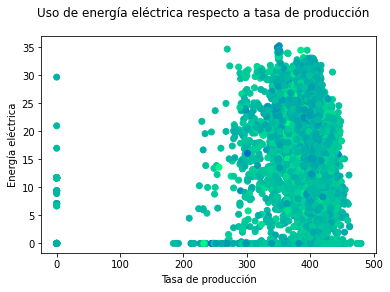

In [ ]:
plt.scatter(df.Tasa_Prod,df.EE, c=df.Dureza, cmap='winter')
plt.xlabel('Tasa de producción')
plt.ylabel('Energía eléctrica')
plt.suptitle('Uso de energía eléctrica respecto a tasa de producción')
plt.show()

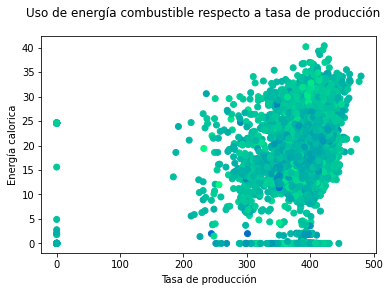

In [ ]:
plt.scatter(df.Tasa_Prod,df.EC, c=df.Dureza, cmap='winter')
plt.xlabel('Tasa de producción')
plt.ylabel('Energía calorica')
plt.suptitle('Uso de energía combustible respecto a tasa de producción')
plt.show()

Obtener el numero de registros en el dataframe 

In [ ]:
print(df.shape[0],' registros con ',df.shape[1],' campos')

9392  registros con  6  campos


In [ ]:
df.info()
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9392 entries, 0 to 9391
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TIME       9392 non-null   datetime64[ns]
 1   Dureza     9391 non-null   float64       
 2   Tasa_Prod  9392 non-null   int64         
 3   EC         9392 non-null   float64       
 4   EE         9392 non-null   float64       
 5   Calidad    9392 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 440.4 KB


#Limpieza de datos


In [ ]:
df.insert(6, 'z_Tasa_Dureza', sp.stats.zscore(df.Dureza))
df.insert(7, 'z_Tasa_Prod', sp.stats.zscore(df.Tasa_Prod))
df.insert(8, 'z_EC', sp.stats.zscore(df.EC))
df.insert(9, 'z_EE', sp.stats.zscore(df.EE))
df.insert(10, 'z_Calidad', sp.stats.zscore(df.Calidad))
df=df.loc[df['z_Tasa_Dureza'].abs()<=2]
df=df.loc[df['z_Tasa_Prod'].abs()<=2]
df=df.loc[df['z_EC'].abs()<=2]
df=df.loc[df['z_EE'].abs()<=2]
df=df.loc[df['z_Calidad'].abs()<=2]
borrar=['z_Tasa_Dureza','z_Tasa_Prod','z_EC','z_EE','z_Calidad']
df=df.drop(borrar,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7822 entries, 0 to 9391
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TIME       7822 non-null   datetime64[ns]
 1   Dureza     7822 non-null   float64       
 2   Tasa_Prod  7822 non-null   int64         
 3   EC         7822 non-null   float64       
 4   EE         7822 non-null   float64       
 5   Calidad    7822 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 427.8 KB


# Analizar la correlación entre las variables 

El coeficiente de correlación expresa la dependencia lineal que existe sobre dos variables. Va desde -1 hasta 1, siendo ambos extremos una relación perfecta y el 0 una ausencia de relación. En el caso de ser positivo, las variables tienen una relación directa, es decir, si una crece, la otra también crecerá o si una decrece, la otra también decrecerá. Mientras que en un relación negativa, es el caso contrario, al crecer una, la otra decrece o visceversa.

Para utilizar el coeficiente de Pearson es necesario que las distribuciones sean normales. Por El Teorema del Límite Central se puede argumentar normalidad. Además: 

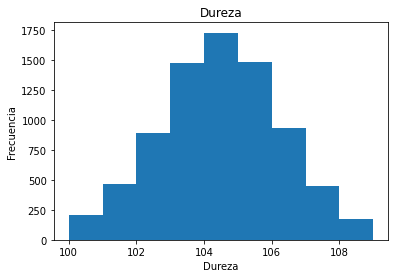

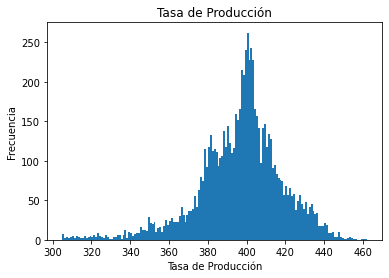

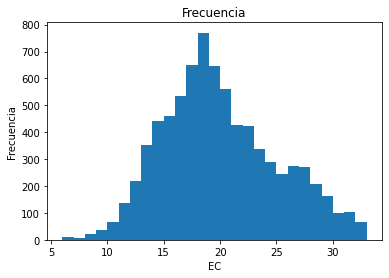

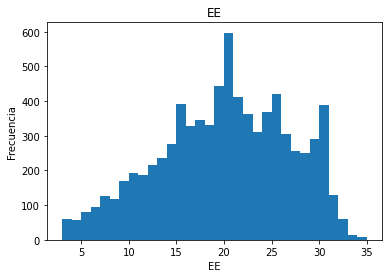

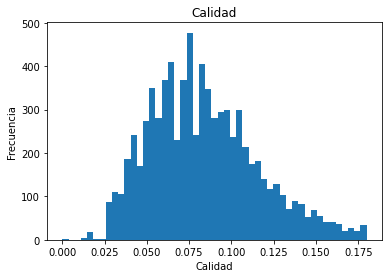

In [ ]:
plt.hist([df.Dureza],bins=range(int(min(df.Dureza)), int(max(df.Dureza))+2))
plt.xlabel('Dureza')
plt.ylabel('Frecuencia')
plt.title('Dureza')
plt.show() 
plt.hist([df.Tasa_Prod], bins=range(min(df.Tasa_Prod), max(df.Tasa_Prod) + 2)) 
plt.xlabel('Tasa de Producción')
plt.ylabel('Frecuencia')
plt.title('Tasa de Producción')
plt.show()
plt.hist([df.EC], bins=range(int(min(df.EC)), int(max(df.EC)) + 2)) 
plt.xlabel('EC')
plt.ylabel('Frecuencia')
plt.title('Frecuencia')
plt.show()
plt.hist([df.EE], bins=range(int(min(df.EE)), int(max(df.EE)) + 2)) 
plt.xlabel('EE')
plt.ylabel('Frecuencia')
plt.title('EE')
plt.show()
plt.hist([df.Calidad], bins=np.linspace(0,0.18) )
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.title('Calidad')
plt.show()

En los histogramas apreciamos que las distribuciones tienen un compartamiento semejante al normal y que por la robustez del Coeficiente de Pearson todavía es posible aplicarlo. 

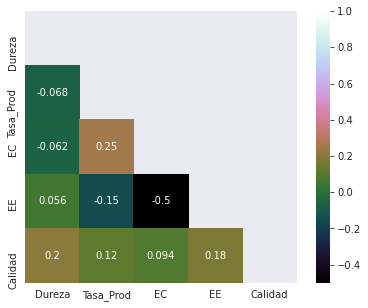

In [ ]:
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, cmap= 'cubehelix', mask=mask,vmax=1 , square=True, annot=True)


Las relaciones que más nos interesan son las de: 
*  Relación Calidad-Energía Combustible: 0.12. Relación positiva baja.
*  Relación Calidad-Energía Eléctrica: 0.16. Relación positiva baja.
*  Relación Energía Eléctrica-Dureza: 0.034. Relación positiva baja.
*  Relación Energía Eléctrica-Tasa de Producción: -0.18. Relación negativa baja.
*  Relación Energía Combustible-Dureza:-0.062. Relación negativa baja.
*  Relación Energía Combustible-Tasa de producción: 0.2. Relación positiva baja.

Pues estás son las que involucran a las variables que buscamos estimar. 







# Costo, Costo Ponderado, EC Ponderado & EE Ponderado

In [ ]:
C1=1
C2=0.724
df['Costo']=C2*df.EC+C1*df.EE
df['Costo_Ponderado']=df.Costo/df.Tasa_Prod
df['EC_Ponderado']=df.EC/df.Tasa_Prod
df['EE_Ponderado']=df.EE/df.Tasa_Prod
df

,TIME,Dureza,Tasa_Prod,EC,EE,Calidad,Costo,Costo_Ponderado,EC_Ponderado,EE_Ponderado
0,1995-01-01,100.0,368,15.1,29.7,0.053,40.6324,0.110414,0.041033,0.080707
4,1995-05-01,102.0,380,17.5,26.6,0.051,39.2700,0.103342,0.046053,0.070000
7,1995-08-01,107.0,403,29.0,3.0,0.129,23.9960,0.059543,0.071960,0.007444
8,1995-09-01,106.0,397,20.5,23.6,0.088,38.4420,0.096831,0.051637,0.059446
9,1995-10-01,105.0,391,18.2,26.3,0.062,39.4768,0.100964,0.046547,0.067263
...,...,...,...,...,...,...,...,...,...,...
9387,2020-09-13,104.0,413,16.9,24.8,0.108,37.0356,0.089675,0.040920,0.060048
9388,2020-09-14,101.0,408,21.7,13.9,0.061,29.6108,0.072575,0.053186,0.034069
9389,2020-09-15,100.0,352,15.6,17.6,0.031,28.8944,0.082086,0.044318,0.050000
9390,2020-09-16,100.0,399,17.0,22.8,0.059,35.1080,0.087990,0.042607,0.057143


# Gráfica 3D


In [ ]:
fig = px.scatter_3d(df, x='EC', y='EE', z='Dureza',
              color='Calidad')
fig.show()

#Gráfico Pairplot
Realizamos a continuación un grafico pairplot para lograr investigar de forma rapida y visual la relación cruzada entre las variables EC, EE y Dureza.

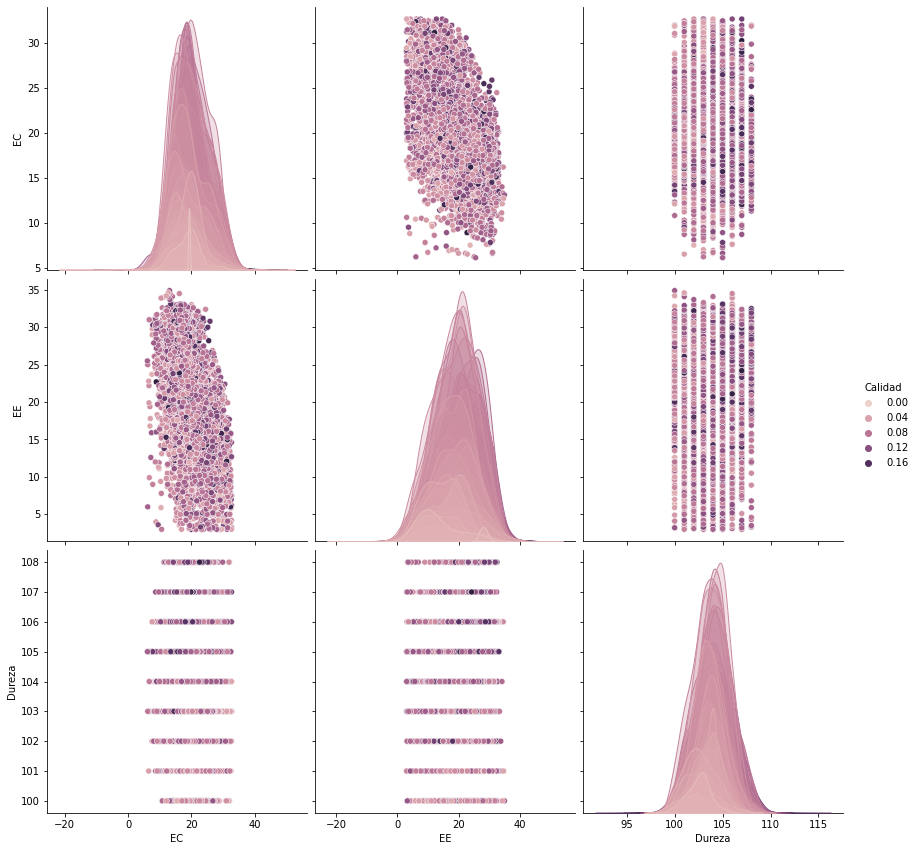

In [ ]:
# Buscamos relaciones entre variables y el nivel de calidad
sns.pairplot(df, hue='Calidad', size=4, vars=["EC", "EE", "Dureza"], kind='scatter')

En la relacion al cruce de variables iguales tenemos histogramas, esto dado a que ambas variables tienen los mismos valores, las variables diferentes EE, EC y Dureza son las que nos interesan, en especial los graficos de dispersión, pero los graficos discontinuos no aportan mucho dado los valores que toma la dureza, al final todo gira en torno a la calidad y es necesario realizar otro tipo de graficos para ver con precisión la relación real.

# Modelación y Evaluación de Datos

**Determina el conjunto de puntos (de filas) que optimizan la energía para cada valor de las variables de producción.**

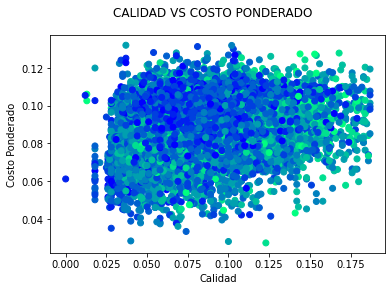

In [ ]:
plt.scatter(df.Calidad, df.Costo_Ponderado,c=df.Dureza, cmap='winter')
plt.xlabel('Calidad')
plt.ylabel('Costo Ponderado')
plt.suptitle('CALIDAD VS COSTO PONDERADO')
plt.show()

## Primer Grupo de Valores

In [ ]:
df1=df.loc[(df.Costo_Ponderado <= 0.075)]
df1

,TIME,Dureza,Tasa_Prod,EC,EE,Calidad,Costo,Costo_Ponderado,EC_Ponderado,EE_Ponderado
7,1995-08-01,107.0,403,29.0,3.0,0.129,23.9960,0.059543,0.071960,0.007444
17,1995-01-18,105.0,400,26.4,5.4,0.103,24.5136,0.061284,0.066000,0.013500
39,1995-09-02,103.0,401,22.6,12.4,0.060,28.7624,0.071727,0.056359,0.030923
42,1995-12-02,103.0,408,22.3,7.7,0.094,23.8452,0.058444,0.054657,0.018873
44,1995-02-14,101.0,393,20.9,3.3,0.093,18.4316,0.046900,0.053181,0.008397
...,...,...,...,...,...,...,...,...,...,...
9351,2020-08-08,100.0,417,21.8,14.8,0.075,30.5832,0.073341,0.052278,0.035492
9365,2020-08-22,102.0,415,24.9,6.4,0.075,24.4276,0.058862,0.060000,0.015422
9374,2020-08-31,103.0,412,25.1,3.7,0.089,21.8724,0.053088,0.060922,0.008981
9386,2020-12-09,103.0,409,23.0,9.1,0.103,25.7520,0.062963,0.056235,0.022249


Tomamos esta cantidad de datos pues nos pareció que mantenía un precio y una calidad aceptable y que además era una cantidad suficiente para realizar exitosamente el entrenamiento y prueba del modelo.

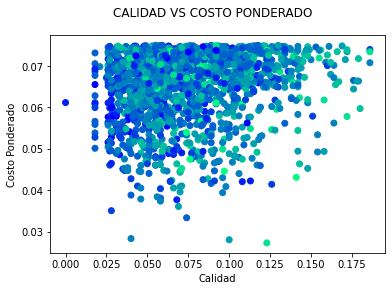

In [ ]:
plt.scatter(df1.Calidad, df1.Costo_Ponderado, c=df1.Dureza,cmap='winter')
plt.xlabel('Calidad')
plt.ylabel('Costo Ponderado')
plt.suptitle('CALIDAD VS COSTO PONDERADO')
plt.show()

**Separa los datos en conjunto de entrenamiento y conjunto de test.**

Consideramos que una cantidad de 80% training y 20% test sería óptima pues nos proporciona una gran cantidad de datos para hacer trabajar a nuestra regresión y evitar así el overfitting. 

In [ ]:
df1=df1.drop(['TIME'],axis=1)
X = df1.drop(['EE','EC','Costo_Ponderado','Costo','EC_Ponderado','EE_Ponderado'],axis=1)
y = df1.drop(['Dureza','Tasa_Prod','Calidad','Costo','EC_Ponderado','EE_Ponderado'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

**Modeliza mediante por lo menos dos regresores (lineales y no-lineales) cuáles escenarios son los más favorables para minimizar la energía.**

**KNN**

El primer regresor empleado será KNeighbors. 

Este algoritmo de machine learning en una explicación resumida lo que hace es utilizar un promedio de los K valores más cercanos para realizar una predicción sobre el nuevo valor. (Singh, A. 2018).
1.   Para elegir el valor óptimo de la K, se grafica la elbow curve donde es fácil identificar el valor K con menor error. 

El valor K representa el número de valores cercanos que se eligen para determinar el promedio que al final será el valor asignado a la variable siendo predecida. El valor K óptimo depende de cada regresión, en general se utiliza aquel que comienza a dar un Error Medio Cuadrático estable. 

Al elegir un valor K bajo se puede caer en el overfitting, en caso contrario al utilizar un valor K alto la modelación puede ser más acertada pero los valores en los extremos están muy indeterminados. (Mille, M., 2019). 



In [ ]:
rmse_val = [] 
for K in range(1,21): #Se ponen a prueba diferentes k en un rango de 1 a 20. 
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) #Se calcula la raíz del error cuadrático medio. 
    rmse_val.append(error) #Se agrega a la lista de errores. 


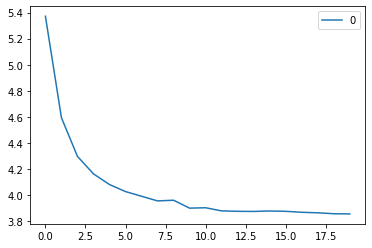

In [ ]:
curve = pd.DataFrame(rmse_val) 
curve.plot() #Graficamos elbow curve 


2.   Implementamos el modelo con k=12.

Implementamos el valor K=12 pues es en ese momento cuando la curva comienza a volverse constante, además consideramos que es un número apropiado para evitar el overfitting tomando en cuenta la cantidad de datos que tenemos. 


In [ ]:
model = KNeighborsRegressor(n_neighbors=12).fit(X_train, y_train)
ythat = model.predict(X_test)
print("R^2 Training:", r2_score(y_train, model.predict(X_train)))
print("R^2 Testing:", r2_score(y_test, ythat))
print("Mean absolute error training:"\
      , mean_absolute_error(y_train, model.predict(X_train),\
                                       multioutput='uniform_average'))
print("Mean absolute error testing:"\
      , mean_absolute_error(y_test, ythat,\
                                       multioutput='uniform_average'))

R^2 Training: 0.1583054489271918
R^2 Testing: 0.03661177350306458
Mean absolute error training: 2.528914100737197
Mean absolute error testing: 2.61888625740626


In [ ]:
print("Predicción de EE: ", model.predict(X_test)[0][0])   # prediccion del EE
print("Predicción de EC: ", model.predict(X_test)[0][1])   # prediccion del EC
print("Predicción Costo Ponderado: ", model.predict(X_test)[0][2])

Predicción de EE:  15.133333333333333
Predicción de EC:  14.841666666666667
Predicción Costo Ponderado:  0.06355870562556387


**Multi Output Regressor**

El segundo regresor será Multi Output Regressor con la Regresión Lineal.

Se utiliza la librería Multi Output para obtener diversas variables de salida, sin embargo el concepto sigue siendo igual al de una Regresión Lineal Multivariada, donde en general se busca minimizar el error cuadrado.

In [ ]:
model2 = MultiOutputRegressor(LinearRegression()).fit(X_train,y_train)
ythat2 = model2.predict(X_test)
print("R^2 Training:", r2_score(y_train, model2.predict(X_train)))
print("R^2 Testing:", r2_score(y_test, ythat2))
print("Mean absolute error training:"\
      , mean_absolute_error(y_train, model2.predict(X_train),\
                                       multioutput='uniform_average'))
print("Mean absolute error testing:"\
      , mean_absolute_error(y_test, ythat2,\
                                       multioutput='uniform_average'))

R^2 Training: 0.06707164237644918
R^2 Testing: 0.05106718136303564
Mean absolute error training: 2.7267352230850608
Mean absolute error testing: 2.6410754786865875


In [ ]:
print("Predicción de EE: ", model2.predict(X_test)[0][0])   
print("Predicción de EC: ", model2.predict(X_test)[0][1])   
print("Predicción Costo Ponderado: ", model2.predict(X_test)[0][2])

Predicción de EE:  19.227992518229268
Predicción de EC:  12.349155132746276
Predicción Costo Ponderado:  0.06472335764794526


**Representar en gráficas comparativas los valores de la predicción y los reales.**

En estas gráficas se busca observar que las variables realmente tengan un comportamiento semejante al de las originales, pues aunque no sean iguales los valores de lo real y lo predicho, mientras se comporten similarmente la predicción puede ser muy buena o aceptable. 

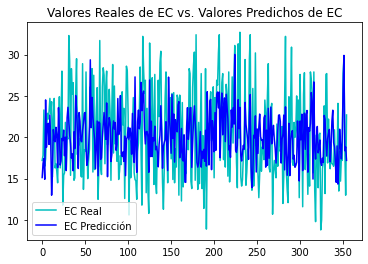

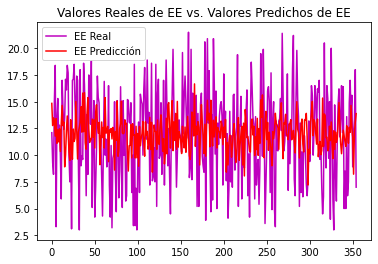

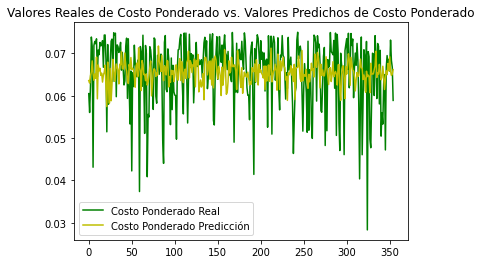

In [ ]:
x_ax =np.arange(355)
plt.plot(x_ax, y_test.EC, label="EC Real", color='c')
plt.plot(x_ax, ythat[:,0], label="EC Predicción", color='b')
plt.title("Valores Reales de EC vs. Valores Predichos de EC")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.EE, label="EE Real", color='m')
plt.plot(x_ax, ythat[:,1], label="EE Predicción", color='r')
plt.title("Valores Reales de EE vs. Valores Predichos de EE")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.Costo_Ponderado, label="Costo Ponderado Real", color='g')
plt.plot(x_ax, ythat[:,2], label="Costo Ponderado Predicción", color='y')
plt.title("Valores Reales de Costo Ponderado vs. Valores Predichos de Costo Ponderado")
plt.legend()
plt.show()

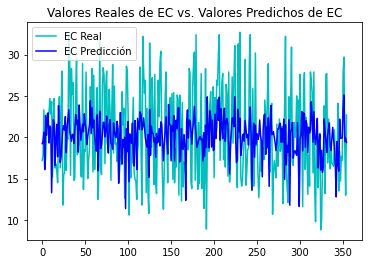

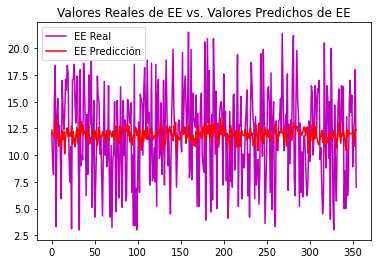

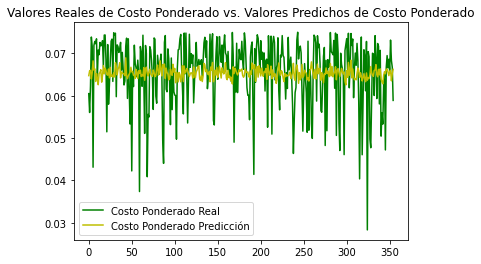

In [ ]:
x_ax =np.arange(355)
plt.plot(x_ax, y_test.EC, label="EC Real", color='c')
plt.plot(x_ax, ythat2[:,0], label="EC Predicción", color='b')
plt.title("Valores Reales de EC vs. Valores Predichos de EC")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.EE, label="EE Real", color='m')
plt.plot(x_ax, ythat2[:,1], label="EE Predicción", color='r')
plt.title("Valores Reales de EE vs. Valores Predichos de EE")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.Costo_Ponderado, label="Costo Ponderado Real", color='g')
plt.plot(x_ax, ythat2[:,2], label="Costo Ponderado Predicción", color='y')
plt.title("Valores Reales de Costo Ponderado vs. Valores Predichos de Costo Ponderado")
plt.legend()
plt.show()

**Evalúa tu modelo**

Basándonos en las gráficas, el modelo más óptimo es  Kneighbors ya que estás son las que imitan el comportamiento original de los datos, los mínimos y los máximos son muy similares entre ellos, indicándonos que aunque no sean exactamente iguales tienen cierto comportamiento similar que nos permitiría hacer una aproximación más acertada.

1.   Normalizamos las variables de entrada.

MinMaxScaler (Escalado de Variables) se encarga de escalar las variables de manera que los nuevos valores se encuentren entre el rango dado, en este caso 0 y 1, pero conservando las proporciones. Utilizamos esta función para transformar las variables de entrada. La fórmula que representa lo que ocurre es:
> X= (X - Xmínima) / (Xmáxima - Xmínima)

> XEscalada = X * (RangoMáximo - RangoMínimo) + RangoMínimo

Se elgió este método pues no utiliza ni la desviación estándar ni la media, a diferencia del Escalado Estándar, evitando así cualquier sensibilidad que estás puedan tener. Es importante no utilizar MinMaxScaler cuando los valores son muy estables, sin embargo en este caso nuestras predicciones se caracterizan por sus altas caídas y subidas derivando en que no hay incoveniente al emplear este método. (Morante, S., 2018)

Es muy importante al utilizar machine learning escalar, pues hay algoritmos que tienen sensibilidad a los valores mayores, tal es el caso de KNN que, al basarse principalmente en distancias, puede cambiar la percepción de lo que es lejano y cercano al estar escaladas las variables de entrada. (Interactive Chaos, 2020).

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))


2.   Repetimos el proceso.



In [ ]:
rmse_val = [] 
for K in range(1,30): #Se ponen a prueba diferentes k en un rango de 1 a 10. 
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) #Se calcula la raíz del error cuadrático medio. 
    rmse_val.append(error) #Se agrega a la lista de errores. 

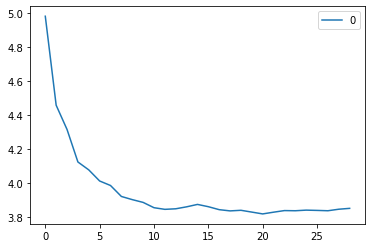

In [ ]:
curve = pd.DataFrame(rmse_val) 
curve.plot() #Graficamos elbow curve

Elegimos K=25 porque al igual que en la gráfica anterior, es cuando el modelo comienza a mostrar estabilidad.

In [ ]:
model = KNeighborsRegressor(n_neighbors=25).fit(X_train, y_train)
ythat = model.predict(X_test)
print("R^2 Training:", r2_score(y_train, model.predict(X_train)))
print("R^2 Testing:", r2_score(y_test, model.predict(X_test)))
print("Mean absolute error training:"\
      , mean_absolute_error(y_train, model.predict(X_train),\
                                       multioutput='uniform_average'))
print("Mean absolute error testing:"\
      , mean_absolute_error(y_test, ythat,\
                                       multioutput='uniform_average'))

R^2 Training: 0.1395926096876927
R^2 Testing: 0.04719966548506475
Mean absolute error training: 2.5906595251128373
Mean absolute error testing: 2.5915249946159413


In [ ]:
print("Predicción de EE: ", model.predict(X_test)[0][0])   
print("Predicción de EC: ", model.predict(X_test)[0][1])   
print("Predicción Costo Ponderado: ", model.predict(X_test)[0][2])

Predicción de EE:  16.659999999999997
Predicción de EC:  15.187999999999999
Predicción Costo Ponderado:  0.06735419382290082


El modelo apenas sufrió variación, esto puede deberse a que los valores no eran cantidades tan drásticas.

## Segundo Grupo de Valores

In [ ]:
df1=df.loc[(df.Costo_Ponderado <= 0.06)]

En este caso tomamos un precio máximo de 0.06, esto puede limitar notablemente nuestra cantidad de datos, pero también representa una disminución buscada en el precio.

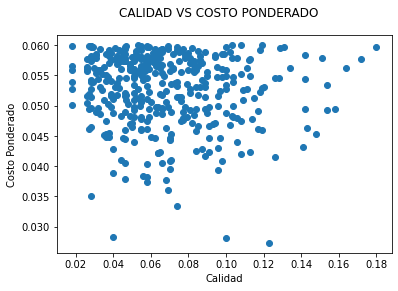

In [ ]:
plt.scatter(df1.Calidad, df1.Costo_Ponderado, cmap='winter')
plt.xlabel('Calidad')
plt.ylabel('Costo Ponderado')
plt.suptitle('CALIDAD VS COSTO PONDERADO')
plt.show()

Mantenemos la proporción de Training y Test.

In [ ]:
df1=df1.drop(['TIME'],axis=1)
X = df1.drop(['EE','EC','Costo_Ponderado','Costo','EC_Ponderado','EE_Ponderado'],axis=1)
y = df1.drop(['Dureza','Tasa_Prod','Calidad','Costo','EC_Ponderado','EE_Ponderado'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Identificamos una nueva K. 

In [ ]:
rmse_val = [] 
for K in range(1,21): #Se ponen a prueba diferentes k en un rango de 1 a 20. 
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) #Se calcula la raíz del error cuadrático medio. 
    rmse_val.append(error) #Se agrega a la lista de errores. 

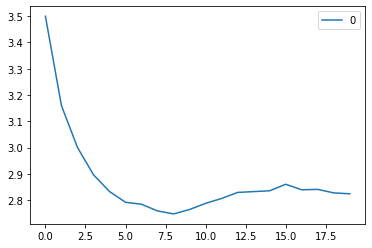

In [ ]:
curve = pd.DataFrame(rmse_val) 
curve.plot() #Graficamos elbow curve 

Se mantendrá el valor de 12, en este caso porque resulta benéfico para la R2 ajustada pues esta comienza a ser positiva a partir de este valor.

In [ ]:
model = KNeighborsRegressor(n_neighbors=12).fit(X_train, y_train)
ythat = model.predict(X_test)
print("R^2 Training:", r2_score(y_train, model.predict(X_train)))
print("R^2 Testing:", r2_score(y_test, ythat))
print("Mean absolute error training:"\
      , mean_absolute_error(y_train, model.predict(X_train),\
                                       multioutput='uniform_average'))
print("Mean absolute error testing:"\
      , mean_absolute_error(y_test, ythat,\
                                       multioutput='uniform_average'))

R^2 Training: 0.15446154678845195
R^2 Testing: 0.005374491611212691
Mean absolute error training: 1.8038413207705701
Mean absolute error testing: 1.807570365595106


In [ ]:
print("Predicción de EE: ", model.predict(X_test)[0][0])   # prediccion del EE
print("Predicción de EC: ", model.predict(X_test)[0][1])   # prediccion del EC
print("Predicción Costo Ponderado: ", model.predict(X_test)[0][2])

Predicción de EE:  19.225
Predicción de EC:  6.866666666666667
Predicción Costo Ponderado:  0.05175854013082692


**Multi Output Regressor**

In [ ]:
model2 = MultiOutputRegressor(LinearRegression()).fit(X_train,y_train)
ythat2 = model2.predict(X_test)
print("R^2 Training:", r2_score(y_train, model2.predict(X_train)))
print("R^2 Testing:", r2_score(y_test, ythat))
print("Mean absolute error training:"\
      , mean_absolute_error(y_train, model2.predict(X_train),\
                                       multioutput='uniform_average'))
print("Mean absolute error testing:"\
      , mean_absolute_error(y_test, ythat2,\
                                       multioutput='uniform_average'))

R^2 Training: 0.06375027572081497
R^2 Testing: 0.005374491611212691
Mean absolute error training: 1.9206749560006593
Mean absolute error testing: 1.6570966112959542


In [ ]:
print("Predicción de EE: ", model2.predict(X_test)[0][0])   
print("Predicción de EC: ", model2.predict(X_test)[0][1])   
print("Predicción Costo Ponderado: ", model2.predict(X_test)[0][2])

Predicción de EE:  18.743034033938464
Predicción de EC:  7.596704719767507
Predicción Costo Ponderado:  0.05263737806668102


**Gráficas**

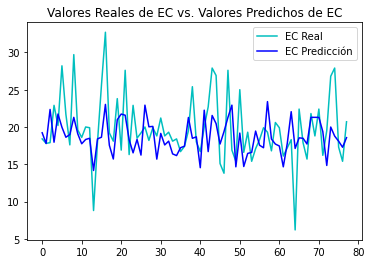

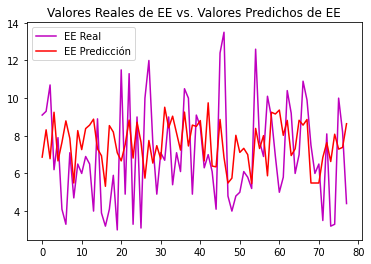

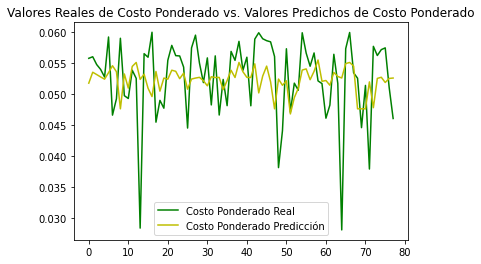

In [ ]:
x_ax =np.arange(78)
plt.plot(x_ax, y_test.EC, label="EC Real", color='c')
plt.plot(x_ax, ythat[:,0], label="EC Predicción", color='b')
plt.title("Valores Reales de EC vs. Valores Predichos de EC")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.EE, label="EE Real", color='m')
plt.plot(x_ax, ythat[:,1], label="EE Predicción", color='r')
plt.title("Valores Reales de EE vs. Valores Predichos de EE")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.Costo_Ponderado, label="Costo Ponderado Real", color='g')
plt.plot(x_ax, ythat[:,2], label="Costo Ponderado Predicción", color='y')
plt.title("Valores Reales de Costo Ponderado vs. Valores Predichos de Costo Ponderado")
plt.legend()
plt.show()

Se puede observar que aunque no sigan exactamente el mismo trayecto, las variables tienen el mismo comportamiento.

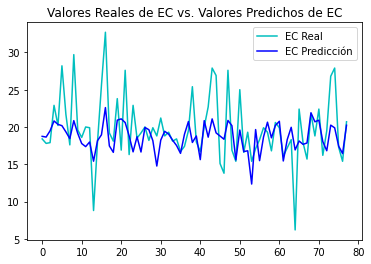

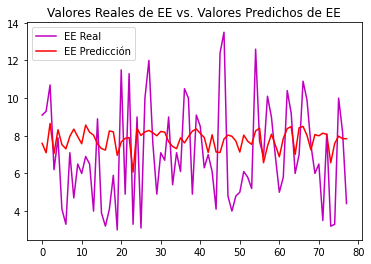

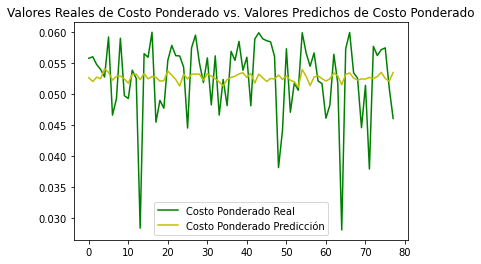

In [ ]:
x_ax =np.arange(78)
plt.plot(x_ax, y_test.EC, label="EC Real", color='c')
plt.plot(x_ax, ythat2[:,0], label="EC Predicción", color='b')
plt.title("Valores Reales de EC vs. Valores Predichos de EC")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.EE, label="EE Real", color='m')
plt.plot(x_ax, ythat2[:,1], label="EE Predicción", color='r')
plt.title("Valores Reales de EE vs. Valores Predichos de EE")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.Costo_Ponderado, label="Costo Ponderado Real", color='g')
plt.plot(x_ax, ythat2[:,2], label="Costo Ponderado Predicción", color='y')
plt.title("Valores Reales de Costo Ponderado vs. Valores Predichos de Costo Ponderado")
plt.legend()
plt.show()

**Evaluación**

En este caso también se utilizará KNN pues sus gráficas son las más coincidientes.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [ ]:
rmse_val = [] 
for K in range(1,30): #Se ponen a prueba diferentes k en un rango de 1 a 10. 
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) #Se calcula la raíz del error cuadrático medio. 
    rmse_val.append(error) #Se agrega a la lista de errores.

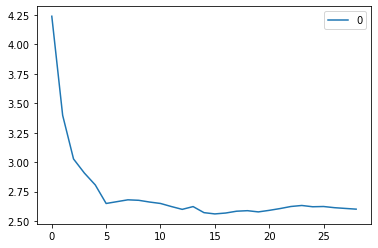

In [ ]:
curve = pd.DataFrame(rmse_val) 
curve.plot() #Graficamos elbow curve

In [ ]:
model = KNeighborsRegressor(n_neighbors=25).fit(X_train, y_train)
ythat = model.predict(X_test)
print("R^2 Training:", r2_score(y_train, model.predict(X_train)))
print("R^2 Testing:", r2_score(y_test, model.predict(X_test)))
print("Mean absolute error training:"\
      , mean_absolute_error(y_train, model.predict(X_train),\
                                       multioutput='uniform_average'))
print("Mean absolute error testing:"\
      , mean_absolute_error(y_test, ythat,\
                                       multioutput='uniform_average'))

R^2 Training: 0.13737849688914097
R^2 Testing: 0.099882155461956


En este caso observamos que sí hubo una mejora en la R2 cuadrada del test d prueba.

## Tercer Grupo de Valores

Ahora reduciremos incluso más el grupo, de forma que intentemos ser más estrictos con la reducción de costos.

In [ ]:
df1=df.loc[(df.Costo_Ponderado <= 0.055)]

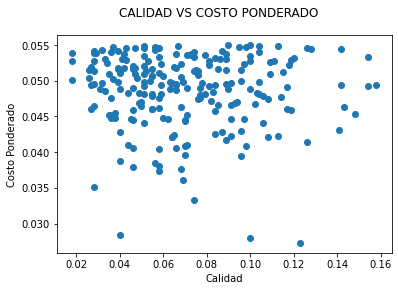

In [ ]:
plt.scatter(df1.Calidad, df1.Costo_Ponderado, cmap='winter')
plt.xlabel('Calidad')
plt.ylabel('Costo Ponderado')
plt.suptitle('CALIDAD VS COSTO PONDERADO')
plt.show()

In [ ]:
df1=df1.drop(['TIME'],axis=1)
X = df1.drop(['EE','EC','Costo_Ponderado','Costo','EC_Ponderado','EE_Ponderado'],axis=1)
y = df1.drop(['Dureza','Tasa_Prod','Calidad','Costo','EC_Ponderado','EE_Ponderado'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

**KNN**

In [ ]:
rmse_val = [] 
for K in range(1,41): #Se ponen a prueba diferentes k en un rango de 1 a 20. 
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) #Se calcula la raíz del error cuadrático medio. 
    rmse_val.append(error) #Se agrega a la lista de errores. 

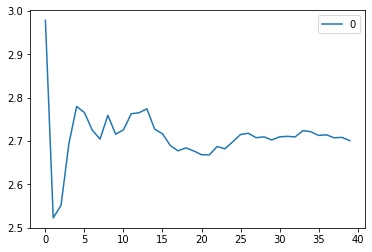

In [ ]:
curve = pd.DataFrame(rmse_val) 
curve.plot() #Graficamos elbow curve 

Elegimos un valor de K grande para evitar overfitting con la poca cantidad de datos.

In [ ]:
model = KNeighborsRegressor(n_neighbors=20).fit(X_train, y_train)
ythat = model.predict(X_test)
print("R^2 Training:", r2_score(y_train, model.predict(X_train)))
print("R^2 Testing:", r2_score(y_test, ythat))

print("Mean absolute error training:"\
      , mean_absolute_error(y_train, model.predict(X_train),\
                                       multioutput='uniform_average'))


print("Mean absolute error testing:"\
      , mean_absolute_error(y_test, ythat,\
                                       multioutput='uniform_average'))

R^2 Training: 0.08410945244332439
R^2 Testing: -0.009098740004624776
Mean absolute error training: 1.4281621005584582
Mean absolute error testing: 1.770233421732929


In [ ]:
print("Predicción de EE: ", model.predict(X_test)[0][0])   
print("Predicción de EC: ", model.predict(X_test)[0][1])   
print("Predicción Costo Ponderado: ", model.predict(X_test)[0][2])  

Predicción de EE:  19.32
Predicción de EC:  6.74
Predicción Costo Ponderado:  0.04886595868950783


**Multi Output Regressor**

In [ ]:
model2 = MultiOutputRegressor(LinearRegression()).fit(X_train,y_train)
ythat2 = model2.predict(X_test)
print("R^2 Training:", r2_score(y_train, model2.predict(X_train)))
print("R^2 Testing:", r2_score(y_test, ythat2))


print("Mean absolute error training:"\
      , mean_absolute_error(y_train, model2.predict(X_train),\
                                       multioutput='uniform_average'))


print("Mean absolute error testing:"\
      , mean_absolute_error(y_test, ythat2,\
                                       multioutput='uniform_average'))

R^2 Training: 0.0809770688037218
R^2 Testing: 0.01649996582338568
Mean absolute error training: 1.4256433476271908
Mean absolute error testing: 1.7281166653031368


In [ ]:
print("Predicción de EE: ", model2.predict(X_test)[0][0])   
print("Predicción de EC: ", model2.predict(X_test)[0][1])   
print("Predicción Costo Ponderado: ", model2.predict(X_test)[0][2])   

Predicción de EE:  19.16439115729687
Predicción de EC:  6.780812010557291
Predicción Costo Ponderado:  0.04863947426992653


**Gráficas**

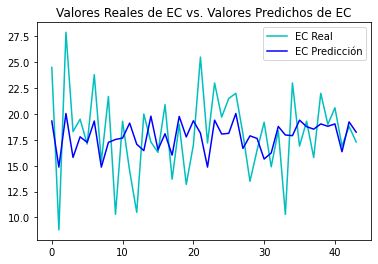

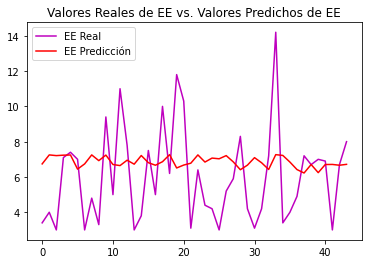

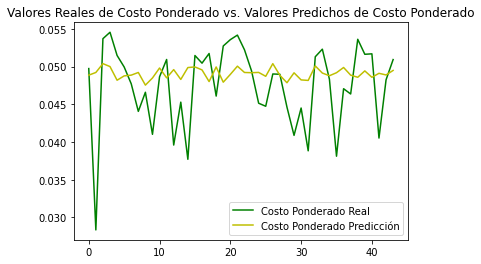

In [ ]:
x_ax =np.arange(44)
plt.plot(x_ax, y_test.EC, label="EC Real", color='c')
plt.plot(x_ax, ythat[:,0], label="EC Predicción", color='b')
plt.title("Valores Reales de EC vs. Valores Predichos de EC")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.EE, label="EE Real", color='m')
plt.plot(x_ax, ythat[:,1], label="EE Predicción", color='r')
plt.title("Valores Reales de EE vs. Valores Predichos de EE")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.Costo_Ponderado, label="Costo Ponderado Real", color='g')
plt.plot(x_ax, ythat[:,2], label="Costo Ponderado Predicción", color='y')
plt.title("Valores Reales de Costo Ponderado vs. Valores Predichos de Costo Ponderado")
plt.legend()
plt.show()

Contrario a las veces anteriores, ahora las gráficas de las variables sí tienen comportamientos muy distintos, sin embargo la más parecida sigue siendo KNN.

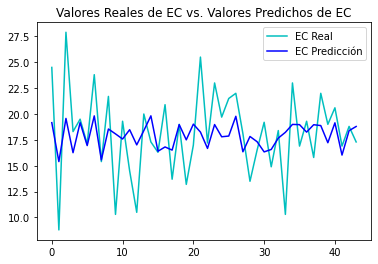

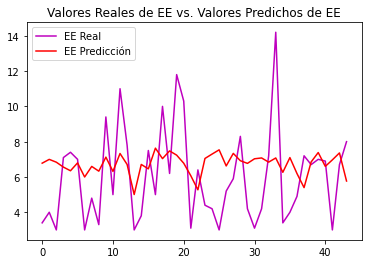

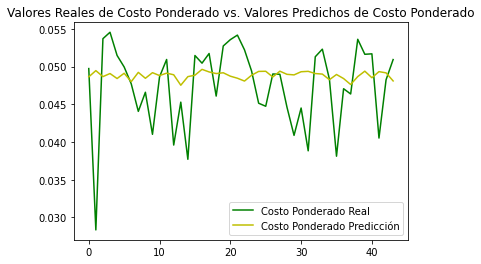

In [ ]:
x_ax =np.arange(44)
plt.plot(x_ax, y_test.EC, label="EC Real", color='c')
plt.plot(x_ax, ythat2[:,0], label="EC Predicción", color='b')
plt.title("Valores Reales de EC vs. Valores Predichos de EC")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.EE, label="EE Real", color='m')
plt.plot(x_ax, ythat2[:,1], label="EE Predicción", color='r')
plt.title("Valores Reales de EE vs. Valores Predichos de EE")
plt.legend()
plt.show()
plt.plot(x_ax, y_test.Costo_Ponderado, label="Costo Ponderado Real", color='g')
plt.plot(x_ax, ythat2[:,2], label="Costo Ponderado Predicción", color='y')
plt.title("Valores Reales de Costo Ponderado vs. Valores Predichos de Costo Ponderado")
plt.legend()
plt.show()

**Evaluación**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [ ]:
rmse_val = [] 
for K in range(1,30): #Se ponen a prueba diferentes k en un rango de 1 a 10. 
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) #Se calcula la raíz del error cuadrático medio. 
    rmse_val.append(error) #Se agrega a la lista de errores.

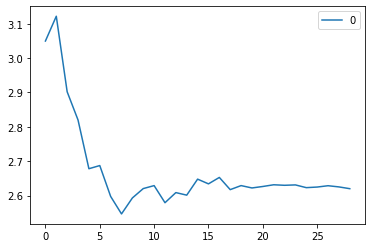

In [ ]:
curve = pd.DataFrame(rmse_val) 
curve.plot() #Graficamos elbow curve

In [ ]:
model = KNeighborsRegressor(n_neighbors=25).fit(X_train, y_train)
ythat = model.predict(X_test)
print("R^2 Training:", r2_score(y_train, model.predict(X_train)))
print("R^2 Testing:", r2_score(y_test, model.predict(X_test)))

print("Mean absolute error training:"\
      , mean_absolute_error(y_train, model.predict(X_train),\
                                       multioutput='uniform_average'))
print("Mean absolute error testing:"\
      , mean_absolute_error(y_test, ythat,\
                                       multioutput='uniform_average'))

R^2 Training: 0.08538760955550873
R^2 Testing: -0.019214200398137
Mean absolute error training: 1.4395670220554153
Mean absolute error testing: 1.7276761947336048


Los resultados de este modelo fueron muy decepcionantes pues incluso el valor de la R2 llega a ser negativo.

# Conclusión

De los modelos evaluados, el más óptimo en todas las ocasiones fue KNN pues este se adaptaba más al comportamiento de las variables.
El conjunto que obtuvo mejores resultados fue el primero, es posible que esto se deba a que tiene una mayor cantidad de datos que le permiten evitar el overfitting.

In [ ]:
df1=df.loc[(df.Costo_Ponderado <= 0.075)]
df1=df1.drop(['TIME'],axis=1)
X = df1.drop(['EE','EC','Costo_Ponderado','Costo','EC_Ponderado','EE_Ponderado'],axis=1)
y = df1.drop(['Dureza','Tasa_Prod','Calidad','Costo','EC_Ponderado','EE_Ponderado'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
model = KNeighborsRegressor(n_neighbors=12).fit(X_train, y_train)
print("Predicción de EE: ", model.predict(X_test)[0][0])   # prediccion del EE
print("Predicción de EC: ", model.predict(X_test)[0][1])   # prediccion del EC
print("Predicción Costo Ponderado: ", model.predict(X_test)[0][2])   # prediccion deL COSTO PONDERADO

Predicción de EE:  15.133333333333333
Predicción de EC:  14.841666666666667
Predicción Costo Ponderado:  0.06355870562556387


# Aportaciones 

A01246619 Salette Noemi
* Análisis de Correlación entre las variables
* Costo, Costo Ponderado, EE Ponderado, EC Ponderado
* Método Kneighbours y multiple linear regression
* Gráficas de predicciones contra valores reales
* Evaluación de modelos
* Segundo Grupo de Valores (sección)
* Tercer Grupo de Valores (sección)


A01620402 Miguel Chávez 
* Importación de datos e índice de fecha
* Dispersiones de energía eléctrica y combustible respecto a tasa de producción
* Limpieza de datos atípicos y nulos
* Matriz de correlaciones
* Separación de training set y test set

A01174385 Francisco Leonid Gálvez Flores
* Gráfica 3D
* Decision Tree (descartado)
* Support Vector Machine (Regressor) (descartado)

A00828359 Isaac Arredondo Padrón
* Gráficas Pairplot 







# Bibliografía
Singh, A.(2018) *A Practical Introduction to K-Nearest Neighbors Algorithm for Regression (with Python code)* Marzo 5, 2021. De Analytics Vihya. Sitio web: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

Morante, S. (2018). *Precauciones a la hora de normalizar datos en Data Science* Marzo 7, 2021. De Telefónica. Sitio web: https://empresas.blogthinkbig.com/precauciones-la-hora-de-normalizar/

Interactive Chaos. (2020). *Escalado de Datos* Marzo 7, 2020. De Interactive Chaos. Sitio web: https://www.interactivechaos.com/es/manual/tutorial-de-machine-learning/escalado-de-datos

Miller, M. (2019). *The Basics: KNN for classification and regression*. Marzo 5, 2021. De Medium. Siti web: https://towardsdatascience.com/the-basics-knn-for-classification-and-regression-c1e8a6c955
